#Data Pre-Processing

Import Necessary Libraries

In [6]:
!pip install pandas
!pip install numpy
!pip install matplotlib
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

/bin/bash: /home/slothonmeth/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: /home/slothonmeth/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: /home/slothonmeth/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#Instructions to use the file:
#1. Collect the daily files for the weather data
#2. Run the function daily_weather_cleanup for each of the 5 districts.
#3. Run warangal_merge function to cleanup and merge the 5 files belong to the warangal district. {This is only applicable for warangal}

In [8]:
def daily_weather_cleanup(district):
  '''
  Arguments: 
  district -> The name of the district

  The function cleans the data in the appropriate directory. The function only works when the following data files are given.
  1. 1x File of 2018 daily weather data.  [All 12 months of 2018]
  2. 4x files of 2019 daily weather data. [Jan to Mar, Apr to Jun, Jul to Sep, Oct to Dec]
  3. 4x files of 2020 daily weather data. [Jan to Mar, Apr to Jun, Jul to Sep, Oct to Dec]
  4. 10x files of 2021 daily weather data. [Jan to Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
  5. 9x files of 2022 daily weather data. [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep]
  '''
  #2018 Cleanup Begins
  data_2018_all = pd.read_csv('raw_data/2018_daily_complete_weather_data_0.csv')
  data_2018_allwarangal = data_2018_all.loc[data_2018_all['district'] == district]
  data_2018_allwarangal = data_2018_allwarangal.drop(columns=['row_id','mandal','location'])
  data_2018_allwarangal['odate'] = pd.to_datetime(data_2018_allwarangal['odate'],format='%d/%m/%y')
  data_2018_allwarangal = data_2018_allwarangal.groupby(['odate', 'district'], as_index=False, sort=True).agg('max')
  data_2018_allwarangal.index = data_2018_allwarangal['odate']
  data_2018_allwarangal = data_2018_allwarangal.drop(columns=['odate'])
  #2018 Cleanup Ends------------------------------------------------------------------------------------------------

  #2019 Cleanup Begins------------------------------------------------------------------------------------------------
  data_2019_jan_to_mar = pd.read_csv('raw_data/January_to_March_2019.csv')
  data_2019_apr_to_jun = pd.read_csv('raw_data/April_to_June_2019.csv')
  data_2019_jul_to_sep = pd.read_csv('raw_data/July_to_Sept_2019.csv')
  data_2019_oct_to_dec = pd.read_csv('raw_data/Oct_to_Dec_2019.csv')
  data_2019_jan_to_mar = data_2019_jan_to_mar.loc[data_2019_jan_to_mar['District'] == district]
  data_2019_jan_to_mar = data_2019_jan_to_mar.drop(columns=['Mandal'])
  data_2019_jan_to_mar['Date'] = pd.to_datetime(data_2019_jan_to_mar['Date'],format='%Y/%m/%d')
  data_2019_jan_to_mar = data_2019_jan_to_mar.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2019_jan_to_mar.index = data_2019_jan_to_mar['Date']
  data_2019_jan_to_mar = data_2019_jan_to_mar.drop(columns=['Date'])

  data_2019_apr_to_jun = data_2019_apr_to_jun.loc[data_2019_apr_to_jun['District'] == district]
  data_2019_apr_to_jun = data_2019_apr_to_jun.drop(columns=['Mandal'])
  data_2019_apr_to_jun['Date'] = pd.to_datetime(data_2019_apr_to_jun['Date'],format='%Y/%m/%d')
  data_2019_apr_to_jun = data_2019_apr_to_jun.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2019_apr_to_jun.index = data_2019_apr_to_jun['Date']
  data_2019_apr_to_jun = data_2019_apr_to_jun.drop(columns=['Date'])

  data_2019_jul_to_sep = data_2019_jul_to_sep.loc[data_2019_jul_to_sep['District'] == district]
  data_2019_jul_to_sep = data_2019_jul_to_sep.drop(columns=['Mandal'])
  data_2019_jul_to_sep['Date'] = pd.to_datetime(data_2019_jul_to_sep['Date'],format='%Y/%m/%d')
  data_2019_jul_to_sep = data_2019_jul_to_sep.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2019_jul_to_sep.index = data_2019_jul_to_sep['Date']
  data_2019_jul_to_sep = data_2019_jul_to_sep.drop(columns=['Date'])

  data_2019_oct_to_dec = data_2019_oct_to_dec.loc[data_2019_oct_to_dec['District'] == district]
  data_2019_oct_to_dec = data_2019_oct_to_dec.drop(columns=['Mandal', "Unnamed: 0"])
  data_2019_oct_to_dec['Date'] = pd.to_datetime(data_2019_oct_to_dec['Date'],format='%Y/%m/%d')
  data_2019_oct_to_dec = data_2019_oct_to_dec.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2019_oct_to_dec.index = data_2019_oct_to_dec['Date']
  data_2019_oct_to_dec = data_2019_oct_to_dec.drop(columns=['Date'])
  data_2019_allwarangal = pd.concat([data_2019_jan_to_mar, data_2019_apr_to_jun, data_2019_jul_to_sep, data_2019_oct_to_dec])
  data_2019_allwarangal.columns = data_2018_allwarangal.columns
  #2019 Cleanup Ends------------------------------------------------------------------------------------------------

  #2020 Cleanup Begins------------------------------------------------------------------------------------------------
  data_2020_jan_to_mar = pd.read_csv('raw_data/jaunary_march_2020.csv')
  data_2020_apr_to_jun = pd.read_csv('raw_data/april_to_june.csv') 
  data_2020_jul_to_sep = pd.read_csv('raw_data/july_to_sept.csv')
  data_2020_oct_to_dec = pd.read_csv('raw_data/October to December 2020.xlsx - data.csv')
  data_2020_oct_to_dec = data_2020_oct_to_dec.drop(columns = ["Dcode","Mcode"])
  data_2020_oct_to_dec.drop([52285], axis=0, inplace=True)
  data_2020_oct_to_dec['Humidity Min (%)'] = data_2020_oct_to_dec['Humidity Min (%)'].astype(float)
  data_2020_jul_to_sep = data_2020_jul_to_sep.drop(columns = ["dmcode"])
  data_2020_apr_to_jun = data_2020_apr_to_jun.drop(columns = ["dmcode"])

  data_2020_jan_to_mar = data_2020_jan_to_mar.loc[data_2020_jan_to_mar['District'] == district]
  data_2020_jan_to_mar = data_2020_jan_to_mar.drop(columns=['Mandal'])
  data_2020_jan_to_mar['Date'] = pd.to_datetime(data_2020_jan_to_mar['Date'],format='%Y/%m/%d')
  data_2020_jan_to_mar = data_2020_jan_to_mar.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2020_jan_to_mar.index = data_2020_jan_to_mar['Date']
  data_2020_jan_to_mar = data_2020_jan_to_mar.drop(columns=['Date'])
  data_2020_jan_to_mar.columns = ['district', 'cumm_rainfall', 'temp_min', 'temp_max', 'humidity_min',
        'humidity_max', 'wind_speed_max', 'wind_speed_min']
  data_2020_jan_to_mar = data_2020_jan_to_mar.iloc[:,[0,1,2,3,4,5,7,6]]

  data_2020_apr_to_jun = data_2020_apr_to_jun.loc[data_2020_apr_to_jun['district'] == district]
  data_2020_apr_to_jun = data_2020_apr_to_jun.drop(columns=['mandal'])
  data_2020_apr_to_jun['date'] = pd.to_datetime(data_2020_apr_to_jun['date'],format='%Y/%m/%d')
  data_2020_apr_to_jun = data_2020_apr_to_jun.groupby(['district', 'date'], as_index=False).agg('max')
  data_2020_apr_to_jun.index = data_2020_apr_to_jun['date']
  data_2020_apr_to_jun = data_2020_apr_to_jun.drop(columns=['date'])
  data_2020_apr_to_jun.columns = ['district', 'cumm_rainfall', 'temp_min', 'temp_max', 'humidity_min',
        'humidity_max', 'wind_speed_max', 'wind_speed_min']
  data_2020_apr_to_jun = data_2020_apr_to_jun.iloc[:,[0,1,2,3,4,5,7,6]]

  data_2020_jul_to_sep = data_2020_jul_to_sep.loc[data_2020_jul_to_sep['district'] == district]
  data_2020_jul_to_sep = data_2020_jul_to_sep.drop(columns=['mandal'])
  data_2020_jul_to_sep['date'] = pd.to_datetime(data_2020_jul_to_sep['date'],format='%Y/%m/%d')
  data_2020_jul_to_sep = data_2020_jul_to_sep.groupby(['district', 'date'], as_index=False).agg('max')
  data_2020_jul_to_sep.index = data_2020_jul_to_sep['date']
  data_2020_jul_to_sep = data_2020_jul_to_sep.drop(columns=['date'])
  data_2020_jul_to_sep.columns = ['district', 'cumm_rainfall', 'temp_min', 'temp_max', 'humidity_min',
        'humidity_max', 'wind_speed_max', 'wind_speed_min']
  data_2020_jul_to_sep = data_2020_jul_to_sep.iloc[:,[0,1,2,3,4,5,7,6]]

  data_2020_oct_to_dec = data_2020_oct_to_dec.loc[data_2020_oct_to_dec['District'] == district]
  data_2020_oct_to_dec = data_2020_oct_to_dec.drop(columns=['Mandal'])
  data_2020_oct_to_dec['Date'] = pd.to_datetime(data_2020_oct_to_dec['Date'],format='%d-%b-%y')
  data_2020_oct_to_dec = data_2020_oct_to_dec.groupby(['District', 'Date'], as_index=False).agg('max')
  data_2020_oct_to_dec.index = data_2020_oct_to_dec['Date']
  data_2020_oct_to_dec = data_2020_oct_to_dec.drop(columns=['Date'])
  data_2020_oct_to_dec.columns = data_2019_allwarangal.columns

  data_2020_allwarangal = pd.concat([data_2020_jan_to_mar, data_2020_apr_to_jun, data_2020_jul_to_sep, data_2020_oct_to_dec])
  #2020 Cleanup Ends------------------------------------------------------------------------------------------------

  #2021 Cleanup Begins-----------------------------------------------------------------------------------------------
  data_2021_jan_to_mar = pd.read_csv('raw_data/Weather_Jan_to_Mar_2021.xlsx - Wearther.csv')
  data_2021_apr = pd.read_csv('raw_data/TS Weather Data April 2021 .csv') 
  data_2021_may = pd.read_csv('raw_data/TS Weather data May 2021.csv')
  data_2021_june = pd.read_csv('raw_data/TS Weather data June 2021.csv')
  data_2021_jul = pd.read_csv('raw_data/TS Weather data July 2021.csv')
  data_2021_aug = pd.read_csv('raw_data/TS Weather data August 2021.csv') 
  data_2021_sep = pd.read_csv('raw_data/TS Weather data September 2021.csv')
  data_2021_oct = pd.read_csv('raw_data/TS Weather data October 2021.csv')
  data_2021_nov = pd.read_csv('raw_data/TS Weather data November 2021.csv')
  data_2021_dec = pd.read_csv('raw_data/TS Weather data December 2021.csv')

  l = [data_2021_jan_to_mar,data_2021_apr,data_2021_may,data_2021_june,data_2021_jul,data_2021_aug,data_2021_sep,data_2021_oct,data_2021_nov,data_2021_dec]
  for i in range(0,10):
    l[i] = l[i].loc[l[i]['District'] == district]
    l[i] = l[i].drop(columns=['Mandal'])
    l[i]['Date'] = pd.to_datetime(l[i]['Date'],format='%d-%b-%y')
    l[i] = l[i].groupby(['District', 'Date'], as_index=False).agg('max')
    l[i].index = l[i]['Date']
    l[i] = l[i].drop(columns=['Date'])
    l[i].columns = data_2019_allwarangal.columns

  data_2021_allwarangal = pd.concat(l)
  #2021 Cleanup Ends------------------------------------------------------------------------------------------------

  #2022 Cleanup Begins----------------------------------------------------------------------------------------------
  data_2022_jan = pd.read_csv('raw_data/TS Weather data January 2022.csv')
  data_2022_feb = pd.read_csv('raw_data/TS Weather data February 2022.csv') 
  data_2022_mar = pd.read_csv('raw_data/TS Weather data March 2022.csv')
  data_2022_apr = pd.read_csv('raw_data/TS Weather data April 2022..csv')
  data_2022_may = pd.read_csv('raw_data/TS Weather data May 2022_0.csv')
  data_2022_jun = pd.read_csv('raw_data/TS Weather data June 2022_0.csv') 
  data_2022_jul = pd.read_csv('raw_data/TS Weather data July 2022_0.csv')
  data_2022_aug = pd.read_csv('raw_data/TS Weather data August 2022.csv')
  data_2022_sep = pd.read_csv('raw_data/TS Weather data September 2022.csv')

  l = [data_2022_jan,data_2022_feb,data_2022_mar,data_2022_apr,data_2022_may,data_2022_jun,data_2022_jul,data_2022_aug,data_2022_sep]
  for i in range(0,9):
    l[i] = l[i].loc[l[i]['District'] == district]
    l[i] = l[i].drop(columns=['Mandal'])
    l[i]['Date'] = pd.to_datetime(l[i]['Date'],format='%d-%b-%y')
    l[i] = l[i].groupby(['District', 'Date'], as_index=False).agg('max')
    l[i].index = l[i]['Date']
    l[i] = l[i].drop(columns=['Date'])
    l[i].columns = data_2019_allwarangal.columns
  
  data_2022_allwarangal = pd.concat(l)
  #2022 Cleanup Ends------------------------------------------------------------------------------------------------

  #Bring all the data into single dataframe-------------------------------------------------------------------------
  warangal = pd.concat([data_2018_allwarangal,data_2019_allwarangal,data_2020_allwarangal,data_2021_allwarangal,data_2022_allwarangal])
  warangal.sort_index(inplace=True)
  plt.figure(figsize=(20,10))

  plt.title("{} District - Temperature Data".format(district))
  plt.plot(warangal.index,warangal['temp_max']) #Plot the function to see if all things went smooth.

  warangal.index.name = 'Date'
  warangal.to_csv('cleaned_data/{}-cleaned.csv'.format(district), index=True) #Save the file in the format of {DISTRICT}-cleaned.csv

Problems with Warangal:
1. daily weather cleanup function must be run for all the Warangal Districts namely:  
  *   Warangal
  *   Warangal (R)
  *   Warangal (U)
  *   Warangal Urban
  *   Warangal Rural

2. Following which we will receive 5 cleaned files which them needs to be merged. Call the warangal_merge function to do so by passing in all the cleaned files from the above step.

In [9]:
def warangal_merge():
  '''
  The function does not take any arguments. Instead, the function takes the 5 required files from the directory mentioned.
  The function writes back the file to the appropriate directory.
  Returns: None
  '''
  r = pd.read_csv('cleaned_data/Warangal (R)-cleaned.csv')
  u = pd.read_csv('cleaned_data/Warangal (U)-cleaned.csv')
  rural = pd.read_csv('cleaned_data/Warangal Rural-cleaned.csv')
  urban = pd.read_csv('cleaned_data/Warangal Urban-cleaned.csv')
  only = pd.read_csv('cleaned_data/Warangal-cleaned.csv')

  r = r.dropna()
  u = u.dropna()
  rural = rural.dropna()
  urban = urban.dropna()
  only = only.dropna()

  warangal = pd.concat([r,u,rural,urban,only])
  warangal['District'] = 'Warangal'
  warangal = warangal.rename(columns={  
      'Unnamed: 0' : 'Date'
  })
  warangal = warangal.drop(columns='district')
  warangal = warangal.groupby(['District', 'Date'], as_index=False).agg('max')
  warangal.index = warangal['Date']
  warangal.drop(columns=['Date'],inplace=True)

  warangal.to_csv('cleaned_data/Warangal-cleaned.csv', index=True)

Calling the functions

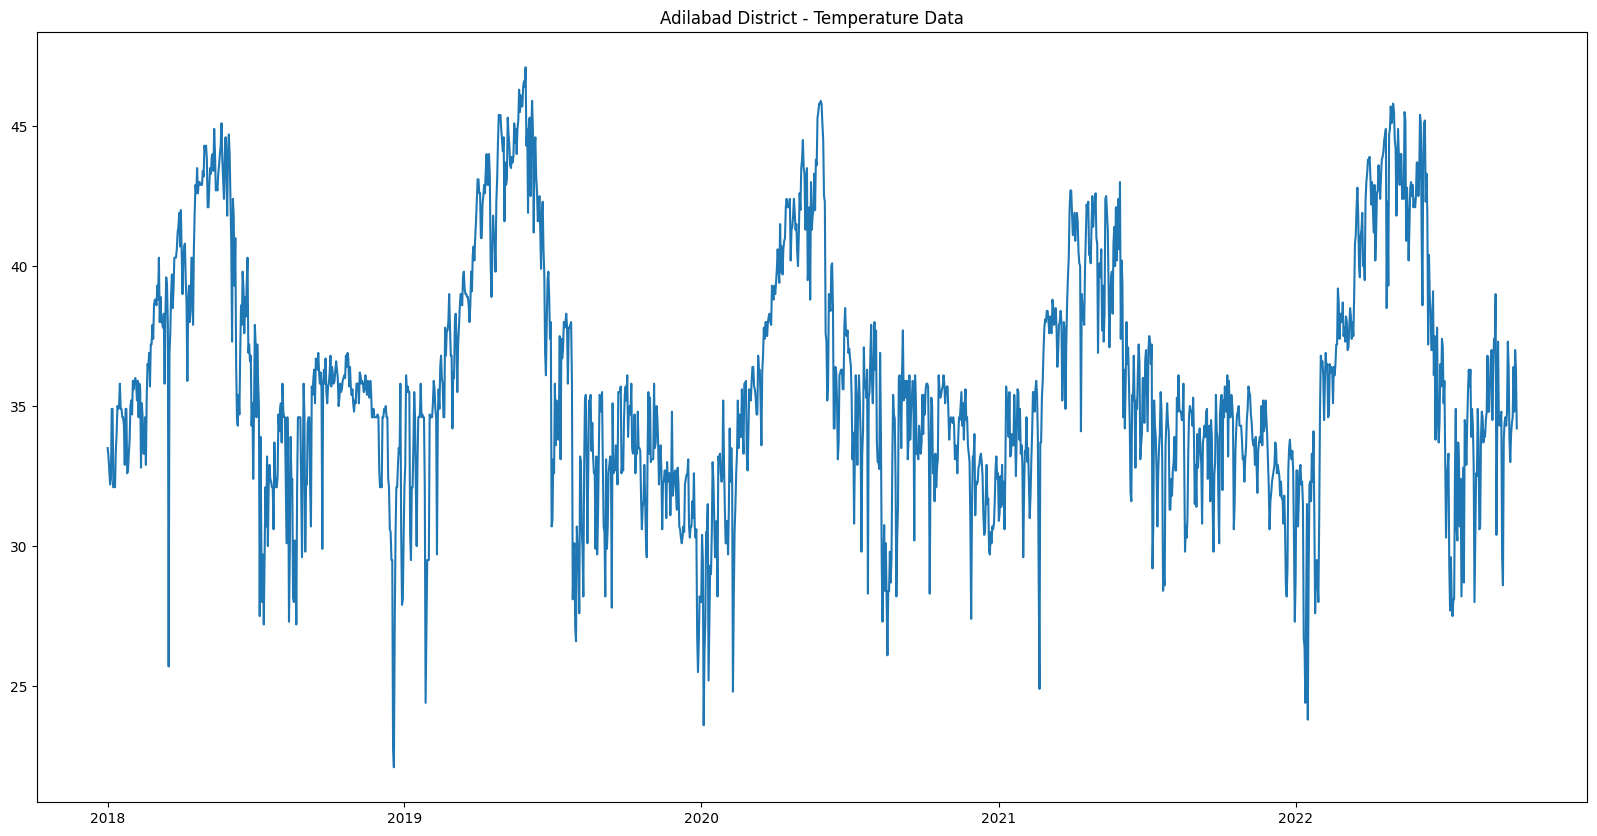

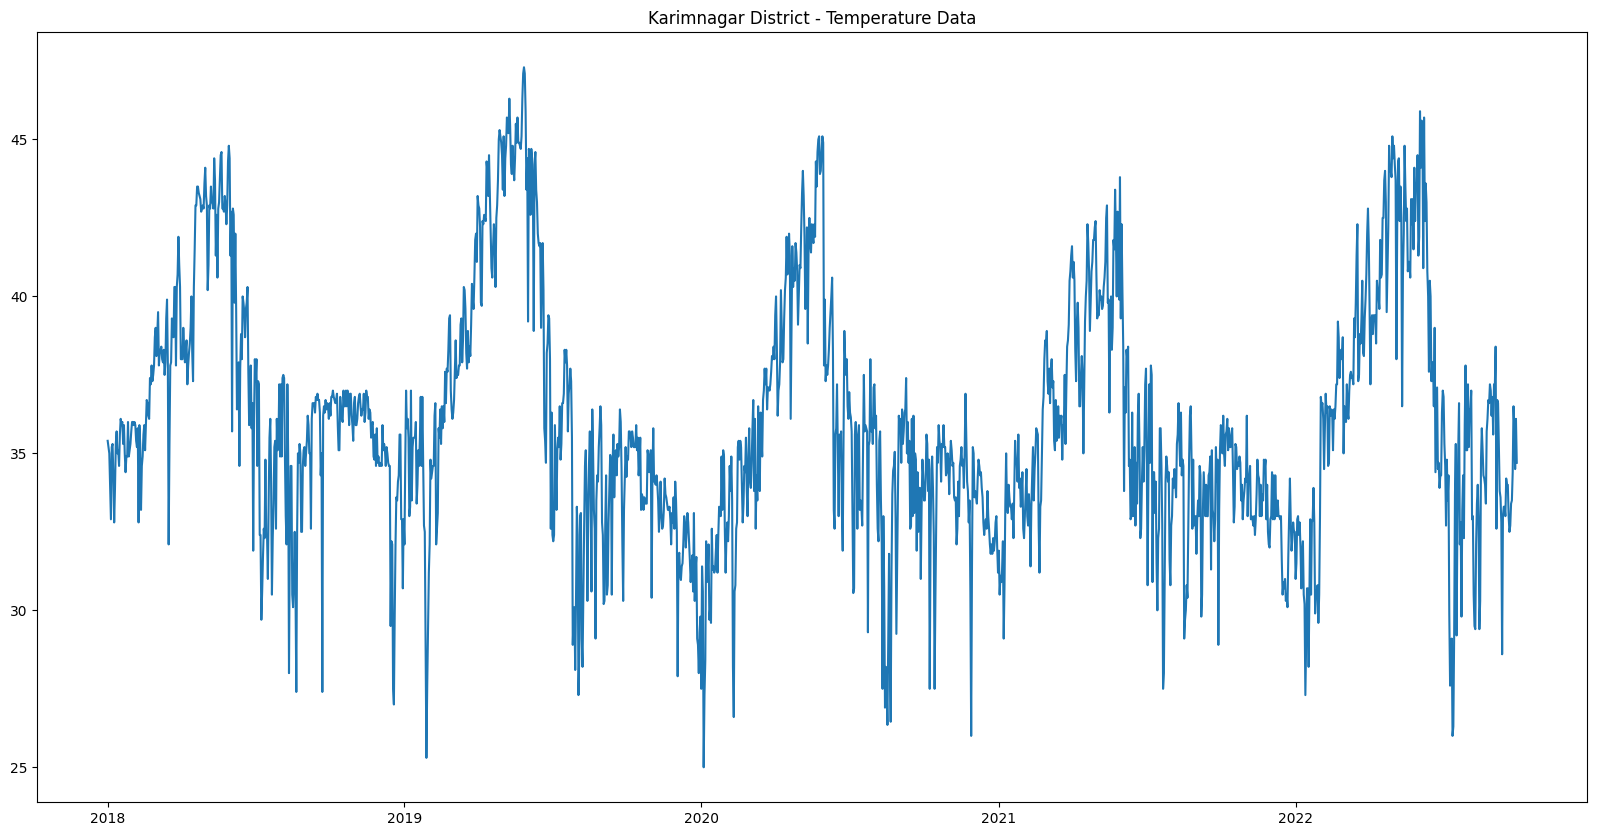

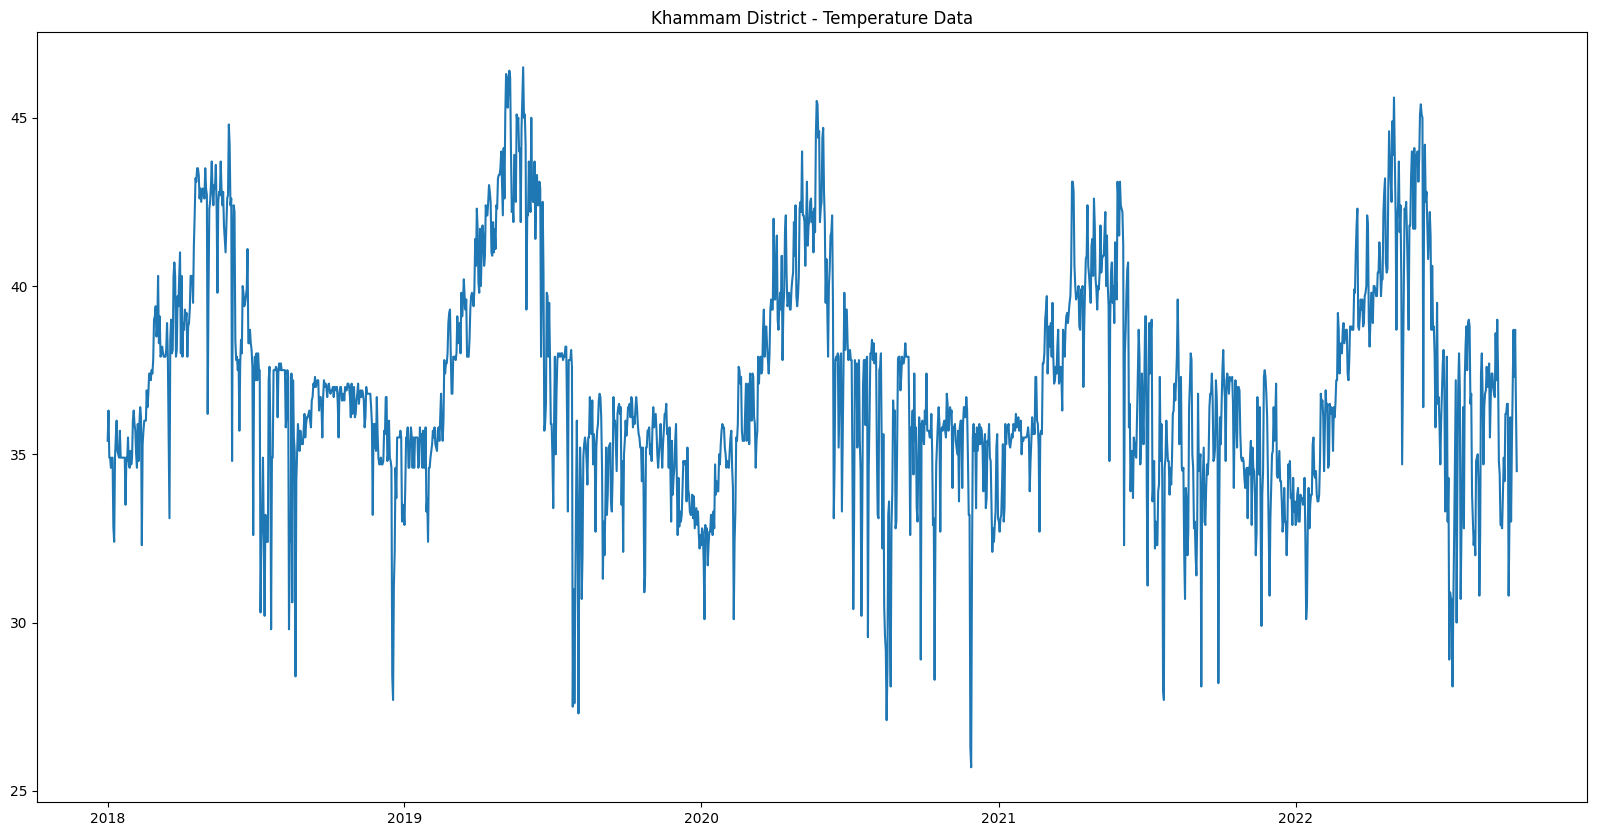

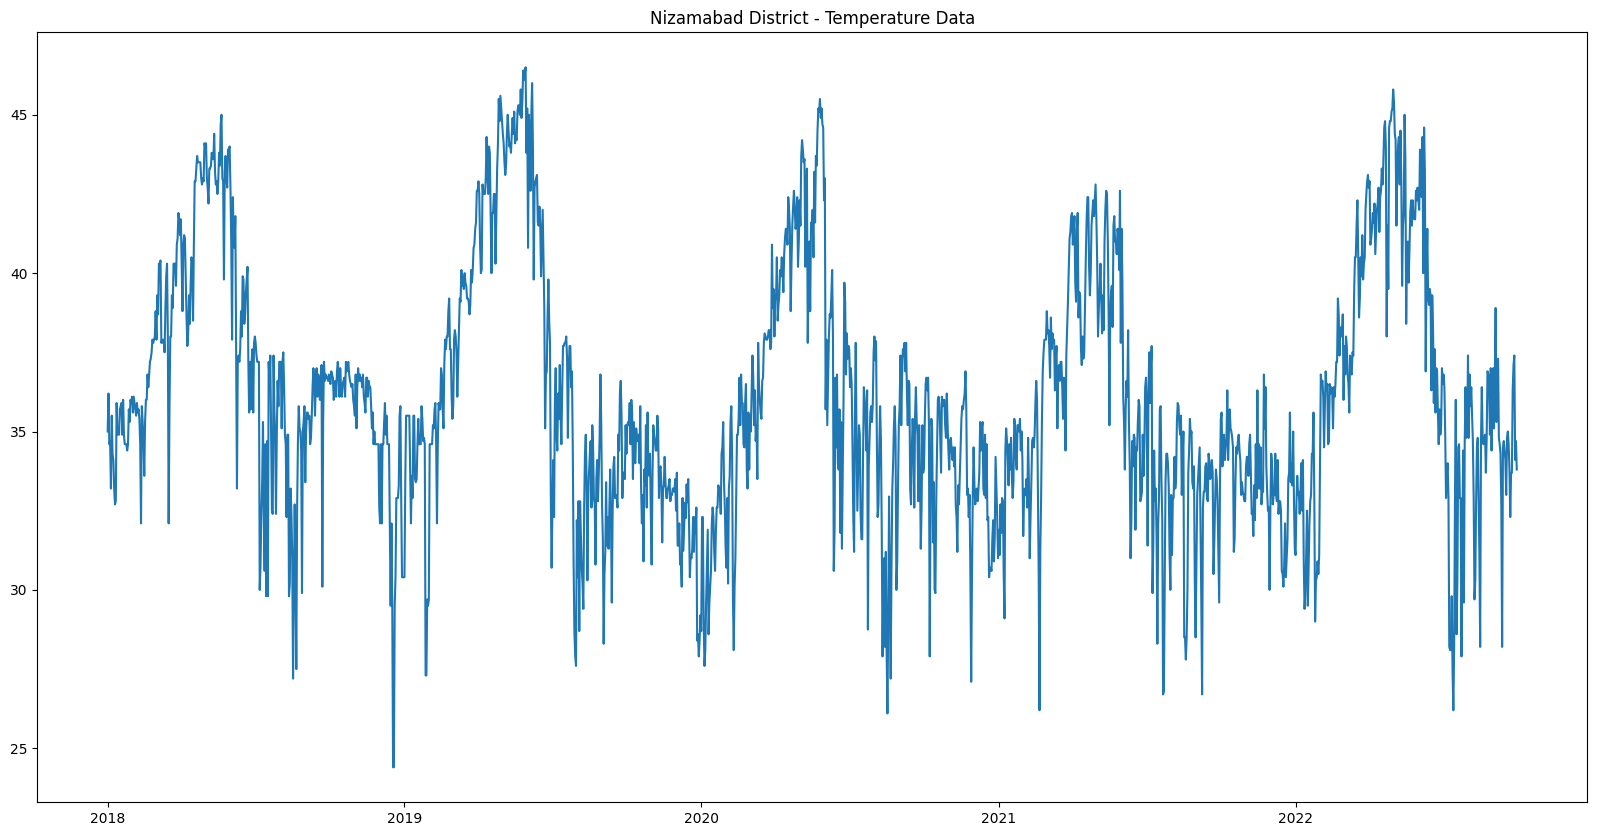

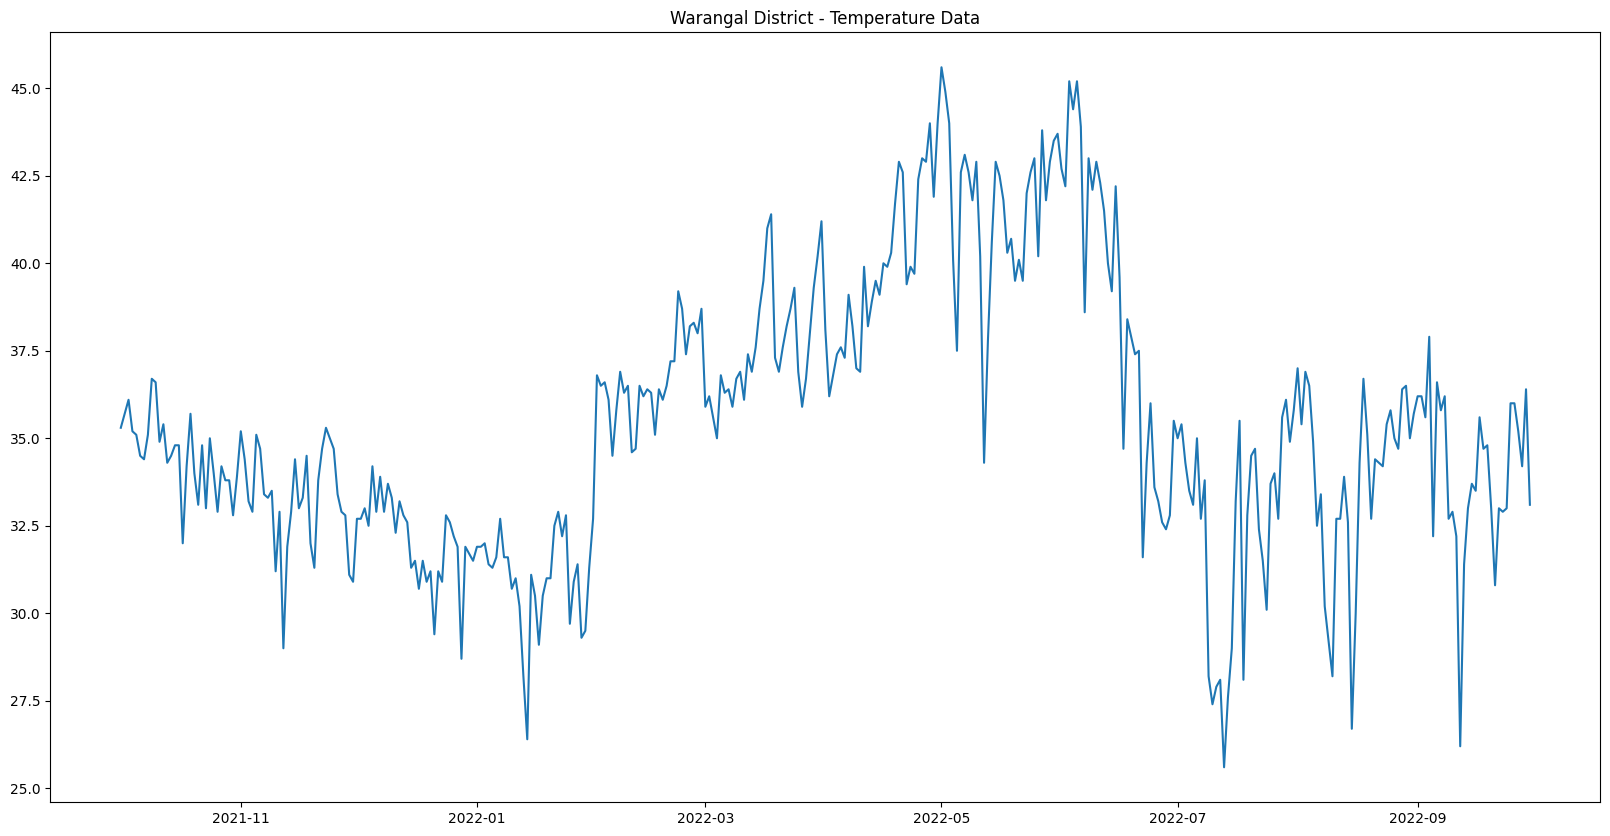

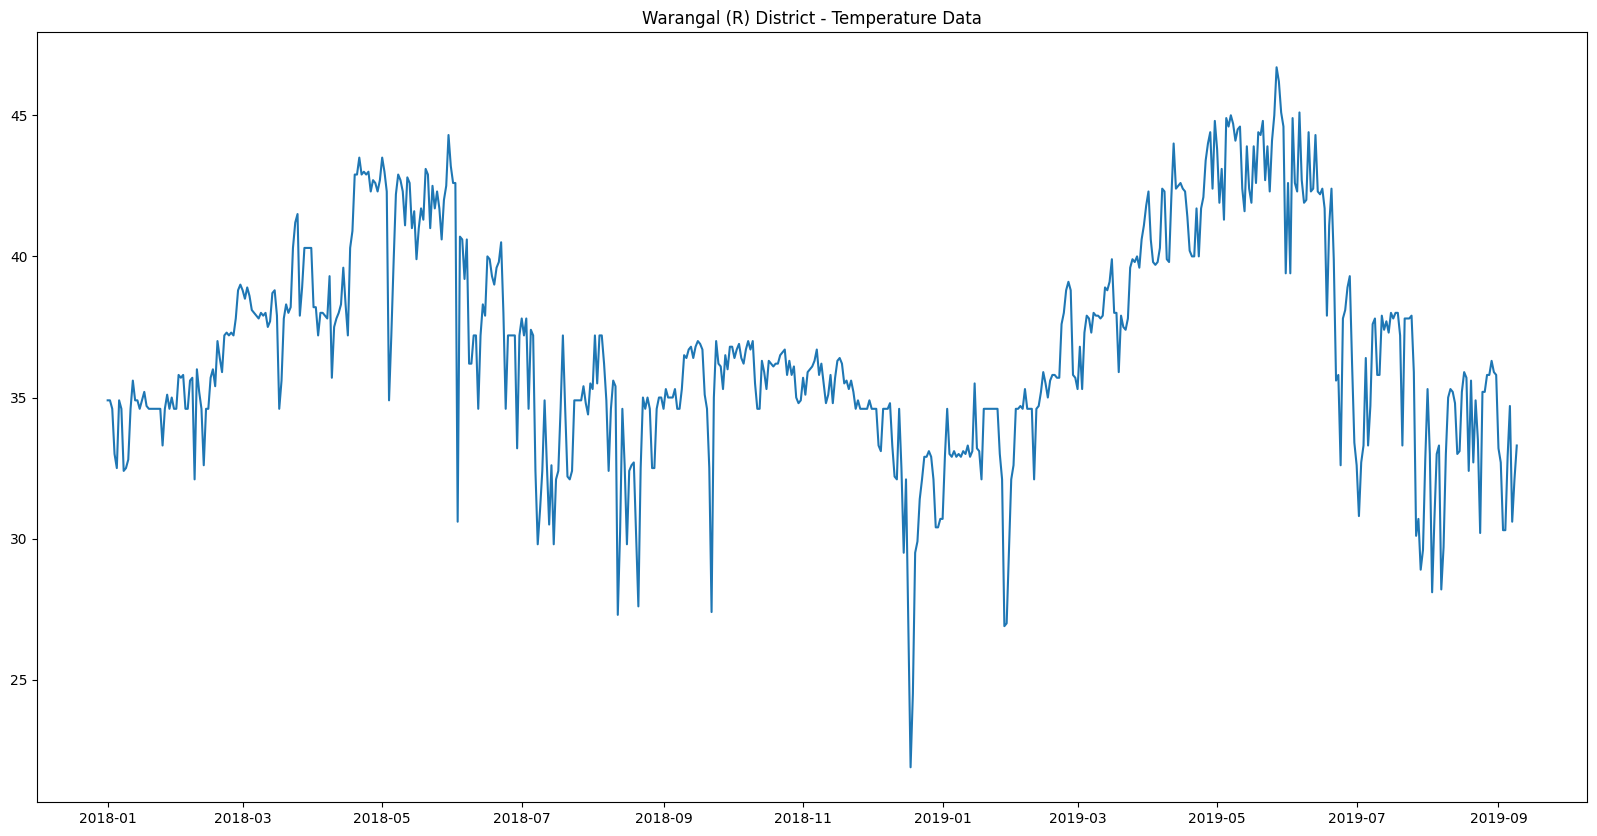

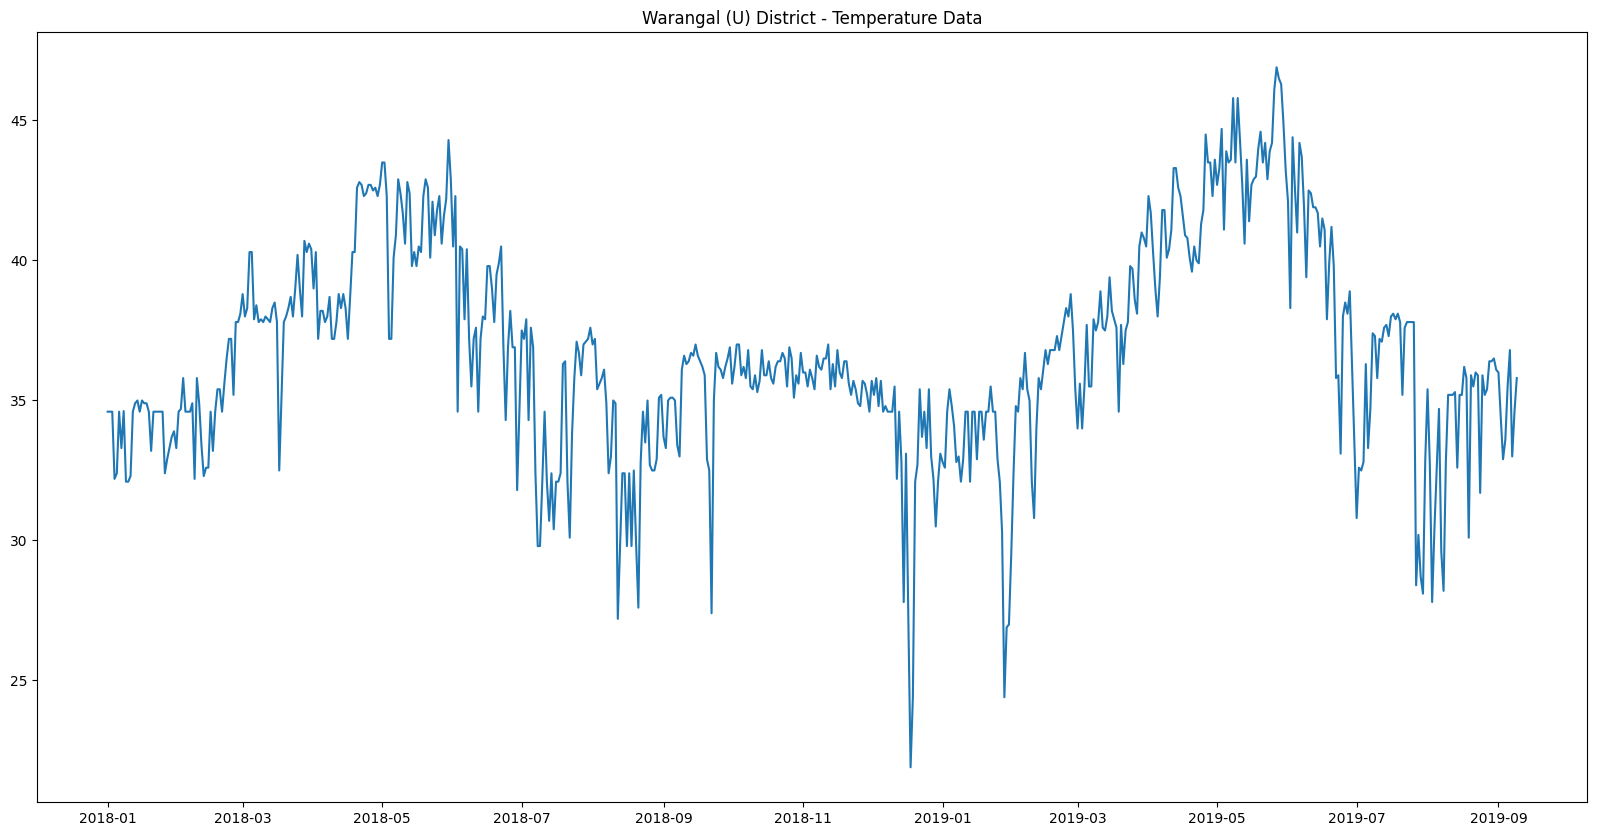

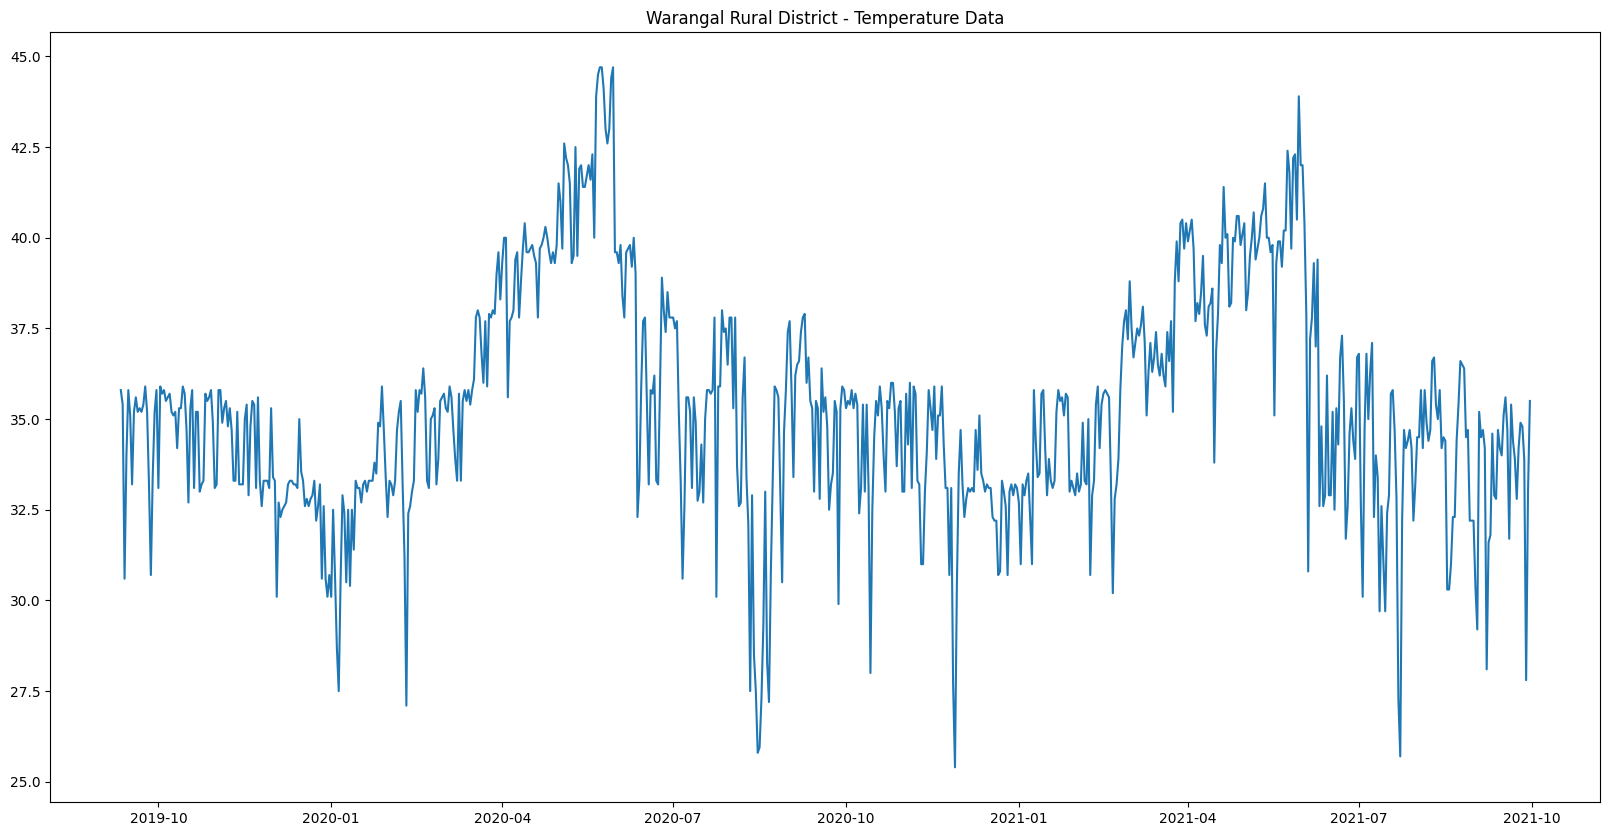

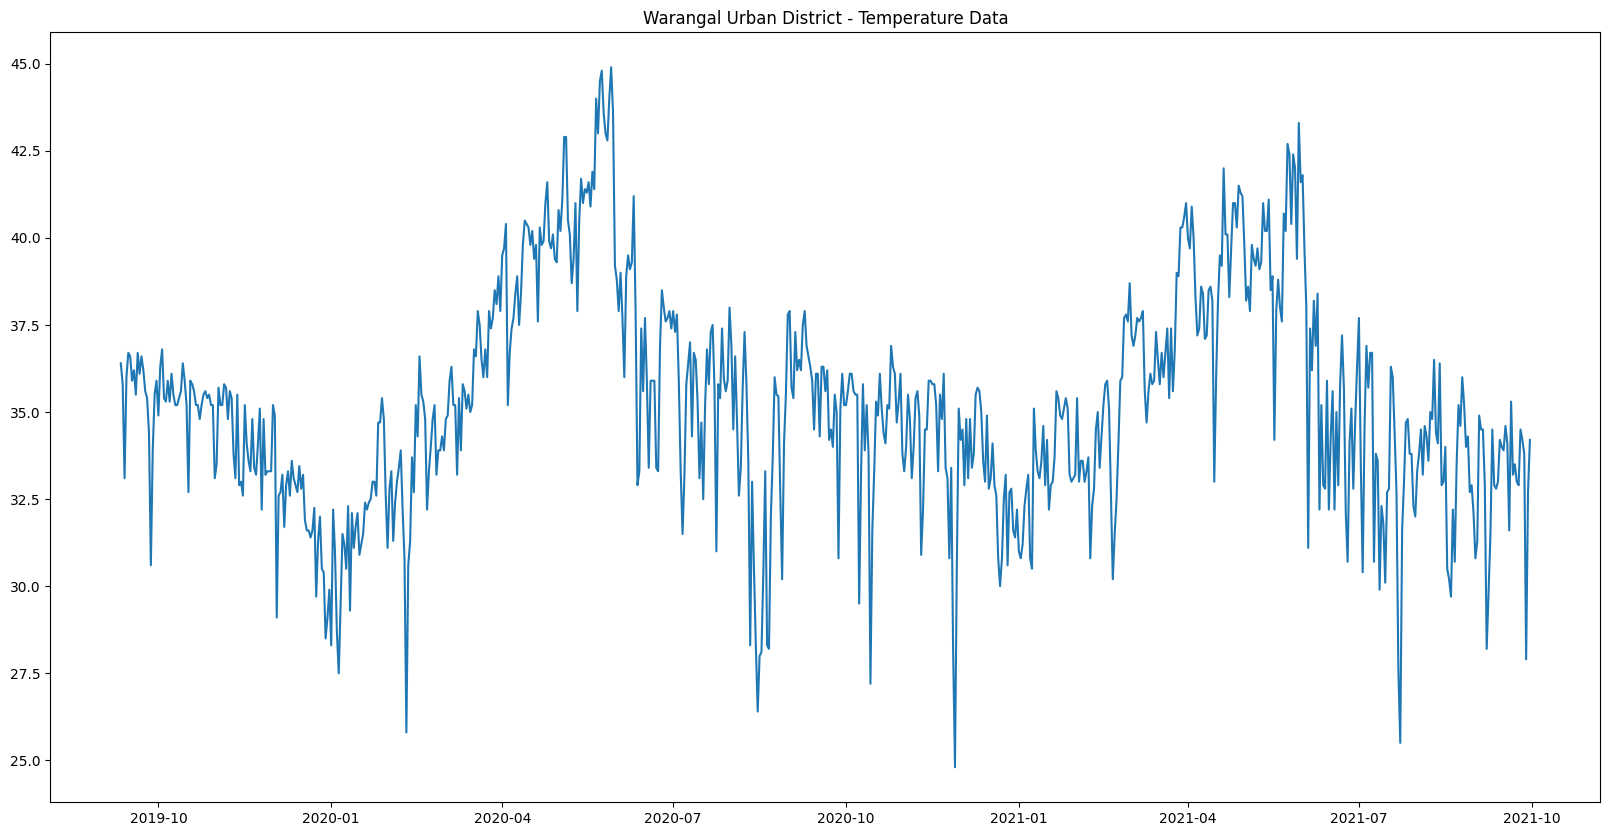

In [10]:
# For the other districts
daily_weather_cleanup('Adilabad')
daily_weather_cleanup('Karimnagar')
daily_weather_cleanup('Khammam')
daily_weather_cleanup('Nizamabad')

#For Warangal
daily_weather_cleanup('Warangal')
daily_weather_cleanup('Warangal (R)')
daily_weather_cleanup('Warangal (U)')
daily_weather_cleanup('Warangal Rural')
daily_weather_cleanup('Warangal Urban')

#Final merge of warangal
warangal_merge()